In [27]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [18]:
data_ = pd.read_csv('./reference_data/historical_mundelein7jan22thru14jan22.csv')
data = pd.read_csv('./reference_data/mundelein_historical.csv')

In [19]:
data = pd.concat([data,data_])
data['DATE'] = pd.to_datetime(data['DATE'])
data['month'] = data['DATE'].dt.month
data['year'] = data['DATE'].dt.year
data = data[data['NAME']=='MUNDELEIN 4 WSW, IL US']
cols = ['STATION','NAME','DATE','PRCP','SNOW','SNWD','TMAX','TMIN','TOBS','month','year']
data = data[cols].copy()
print(data.shape)
print('''Earliest Date = {}
Latest Date = {}'''.format(min(data['DATE']),max(data['DATE'])))
data.head()

(8050, 11)
Earliest Date = 2000-01-01 00:00:00
Latest Date = 2022-01-14 00:00:00


,STATION,NAME,DATE,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,month,year
0,USC00115961,"MUNDELEIN 4 WSW, IL US",2000-01-01,0.00,0.0,0.0,41.0,29.0,36.0,1,2000
1,USC00115961,"MUNDELEIN 4 WSW, IL US",2000-01-02,0.03,0.0,0.0,47.0,34.0,45.0,1,2000
2,USC00115961,"MUNDELEIN 4 WSW, IL US",2000-01-03,0.00,0.0,0.0,59.0,34.0,35.0,1,2000
3,USC00115961,"MUNDELEIN 4 WSW, IL US",2000-01-04,0.29,0.6,1.0,36.0,25.0,26.0,1,2000
4,USC00115961,"MUNDELEIN 4 WSW, IL US",2000-01-05,0.00,0.0,1.0,29.0,11.0,11.0,1,2000


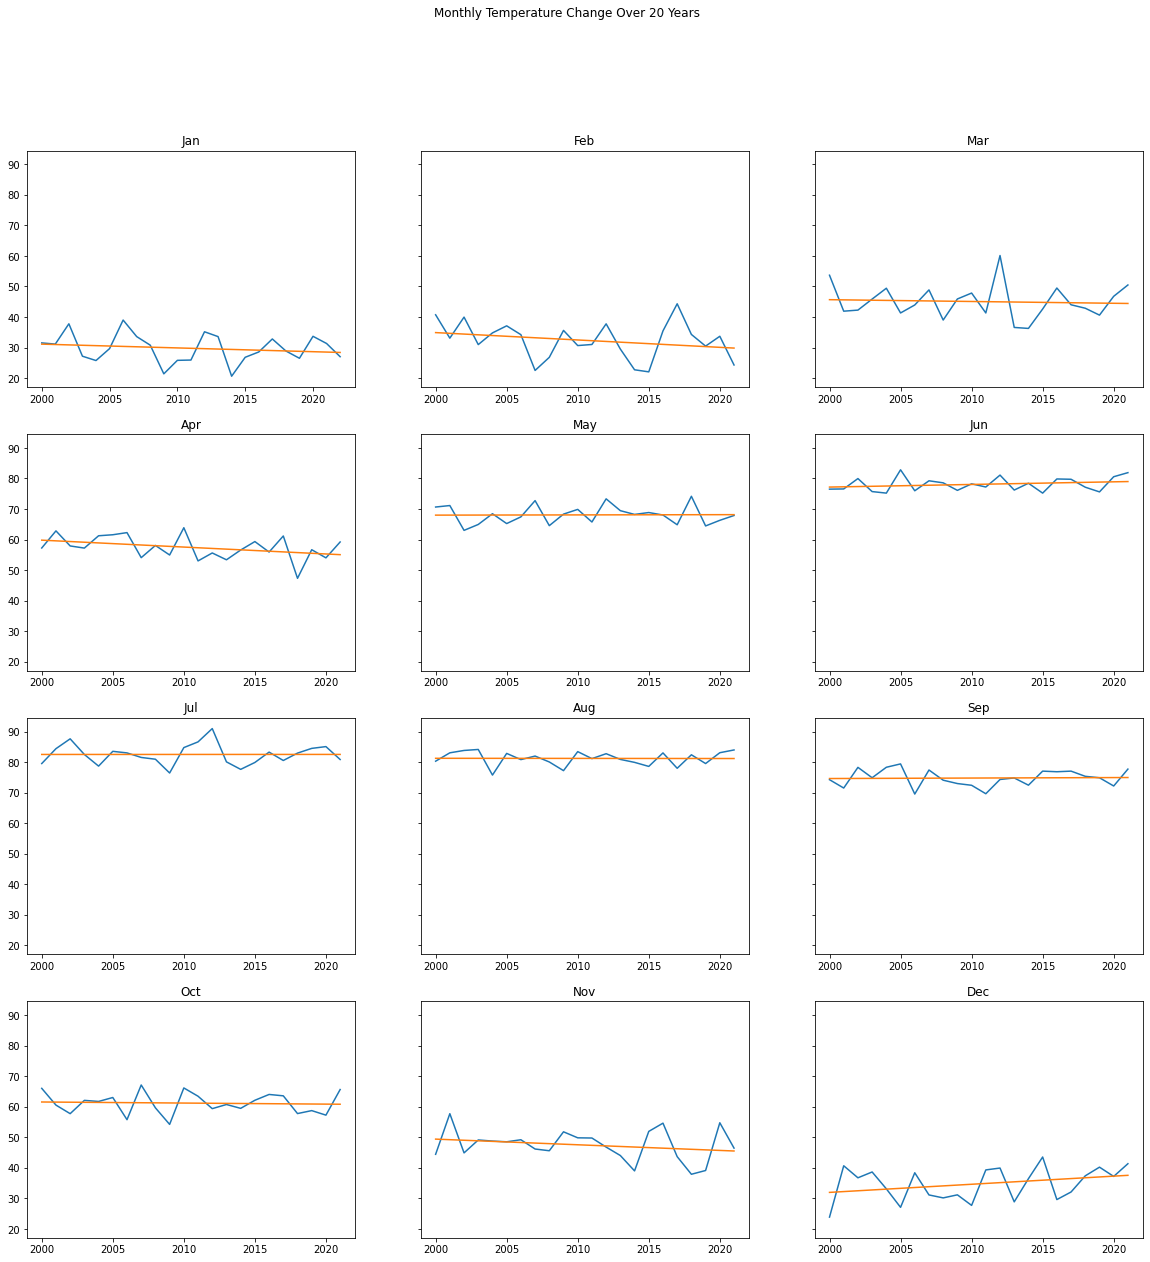

In [32]:
month_num = [x for x in range(1,13)]
month_name = list(map(lambda x:dt.date(month = x,year = 2021,day = 1).strftime('%b'), month_num))
month_dict = dict(zip(month_num,month_name))
f, axes = plt.subplots(nrows = 4,ncols = 3,figsize = (20,20),sharey = True)
axes = axes.flatten()
m = 1
for i in range(0,12):
    series = data[['year','TMAX']][data.month == m].groupby(by = 'year').mean()
    x = np.array(series.index)
    y = np.array(series.values)
    axes[i].plot(x,y)
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z.reshape(1,2)[0])
    axes[i].plot(x,p(x))
    
    axes[i].set_title('{}'.format(month_dict[m]))
    m+=1
f.suptitle('Monthly Temperature Change Over 20 Years')
plt.show()

<AxesSubplot:xlabel='DATE'>

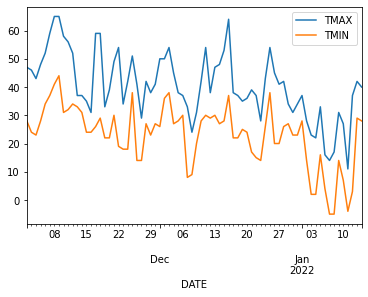

In [14]:
data[['DATE','TMAX','TMIN']][data["DATE"]>pd.to_datetime('11/01/2021')].plot(x = 'DATE')

In [15]:
data.to_csv('./reference_data/clean_weather_data.csv')

In [31]:
month_num

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]